In [77]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt   
import seaborn as sns  

# Load the Data-set

In [78]:
ai_job = pd.read_csv("ai_job_dataset.csv")

In [79]:
ai_job.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [80]:
ai_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [81]:
ai_job.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [82]:
ai_job.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [83]:
ai_job['application_deadline'].head()

0    2024-11-07
1    2025-01-11
2    2025-04-07
3    2025-02-24
4    2025-06-23
Name: application_deadline, dtype: object

In [84]:
type(ai_job['application_deadline'][0])

str

Here application deadline columns date in the form of string so i want to convert into timestamp

In [85]:
ai_job['application_deadline'] = pd.to_datetime(ai_job['application_deadline'])

In [86]:
ai_job['application_deadline'].head(5)

0   2024-11-07
1   2025-01-11
2   2025-04-07
3   2025-02-24
4   2025-06-23
Name: application_deadline, dtype: datetime64[ns]

In [87]:
type(ai_job['application_deadline'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [88]:
ai_job['benefits_score'].value_counts()

benefits_score
9.9     338
9.2     334
8.5     331
5.1     329
5.5     329
6.5     326
9.0     325
8.6     316
5.6     314
8.3     314
8.9     313
7.3     312
6.4     309
8.8     309
8.1     309
9.4     308
7.6     307
7.1     307
5.7     306
9.3     304
9.8     304
7.9     304
5.3     302
5.4     302
6.8     301
7.4     301
6.1     296
5.2     296
6.9     294
5.8     294
7.5     294
7.7     294
8.0     293
9.1     293
9.7     292
6.6     289
6.3     286
6.2     285
6.0     285
7.2     284
6.7     282
8.4     282
9.6     281
7.0     281
5.9     277
7.8     276
8.7     276
9.5     273
8.2     262
10.0    142
5.0     139
Name: count, dtype: int64

In [89]:
ai_job['company_location'].unique()

array(['China', 'Canada', 'Switzerland', 'India', 'France', 'Germany',
       'United Kingdom', 'Singapore', 'Austria', 'Sweden', 'South Korea',
       'Norway', 'Netherlands', 'United States', 'Israel', 'Australia',
       'Ireland', 'Denmark', 'Finland', 'Japan'], dtype=object)

In [90]:
ai_job['company_location'].value_counts()

company_location
Germany           814
Denmark           778
Canada            769
France            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Japan             733
Finland           733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64

In [91]:
ai_job['company_name'].unique()

array(['Smart Analytics', 'TechCorp Inc', 'Autonomous Tech',
       'Future Systems', 'Advanced Robotics', 'Neural Networks Co',
       'DataVision Ltd', 'Cloud AI Solutions', 'Quantum Computing Inc',
       'Predictive Systems', 'AI Innovations', 'Algorithmic Solutions',
       'Cognitive Computing', 'DeepTech Ventures',
       'Machine Intelligence Group', 'Digital Transformation LLC'],
      dtype=object)

In [92]:
ai_job['company_name'].value_counts()

company_name
TechCorp Inc                  980
Cognitive Computing           972
AI Innovations                964
Digital Transformation LLC    961
Quantum Computing Inc         960
Future Systems                960
Cloud AI Solutions            951
Predictive Systems            947
Smart Analytics               927
Advanced Robotics             925
Neural Networks Co            922
Machine Intelligence Group    922
Autonomous Tech               918
DataVision Ltd                909
DeepTech Ventures             897
Algorithmic Solutions         885
Name: count, dtype: int64

In [93]:
ai_job['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [94]:
ai_job['company_size'].value_counts()

company_size
S    5007
L    4998
M    4995
Name: count, dtype: int64

In [95]:
ai_job['education_required'].value_counts()

education_required
Bachelor     3789
Associate    3785
Master       3748
PhD          3678
Name: count, dtype: int64

In [96]:
ai_job['employee_residence'].value_counts()

employee_residence
Sweden            790
France            781
Denmark           777
Austria           776
India             772
Germany           769
South Korea       763
Canada            762
China             761
Netherlands       758
United Kingdom    750
Switzerland       748
Ireland           740
Singapore         740
Israel            731
Australia         730
Norway            726
United States     716
Finland           710
Japan             700
Name: count, dtype: int64

In [97]:
ai_job['employment_type'].value_counts()

employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64

In [98]:
ai_job['experience_level'].value_counts()

experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64

In [99]:
ai_job['industry'].value_counts()

industry
Retail                1063
Media                 1045
Automotive            1020
Consulting            1020
Technology            1011
Real Estate           1007
Government             998
Transportation         997
Telecommunications     997
Healthcare             997
Finance                984
Energy                 976
Gaming                 967
Manufacturing          962
Education              956
Name: count, dtype: int64

In [100]:
ai_job['job_description_length'].value_counts()

job_description_length
1519    19
1747    18
1957    17
1617    17
1176    16
        ..
2032     1
1138     1
2348     1
1530     1
764      1
Name: count, Length: 2000, dtype: int64

In [101]:
ai_job['job_title'].value_counts()

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64

In [102]:
type(ai_job['posting_date'][0])

str

In [103]:
ai_job['posting_date'] = pd.to_datetime(ai_job['posting_date'])

In [104]:
type(ai_job['posting_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [105]:
ai_job['remote_ratio'].value_counts()

remote_ratio
0      5075
50     5005
100    4920
Name: count, dtype: int64

In [106]:
ai_job['required_skills'].value_counts()

required_skills
Python, TensorFlow, PyTorch                             17
Python, TensorFlow, Tableau                              9
Python, TensorFlow, Linux                                7
Python, TensorFlow, MLOps                                7
Python, TensorFlow, Data Visualization                   7
                                                        ..
Tableau, Java, R, Spark                                  1
Python, Spark, MLOps, Computer Vision, Deep Learning     1
R, Tableau, Git, Python, Java                            1
GCP, Git, Mathematics                                    1
Kubernetes, Spark, AWS, Git                              1
Name: count, Length: 13663, dtype: int64

In [107]:
ai_job['salary_currency'].unique()

array(['USD', 'EUR', 'GBP'], dtype=object)

In [108]:
ai_job['years_experience'].value_counts()

years_experience
0     1890
1     1828
4     1295
3     1247
2     1239
7      769
5      757
6      753
9      742
8      720
16     403
15     392
13     391
10     384
19     378
11     373
14     364
17     363
12     362
18     350
Name: count, dtype: int64

# Data visulization 

1 What is the distribution of experience levels (e.g Entery , mid , Senior , Executive ) across all jobs ?? 

In [109]:
ai_job.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [110]:
ai_job['experience_level'].unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

In [111]:
def experience(exp):
    if exp == 'SE':
        return 'Senior-Level '
    elif exp == 'EN':
        return 'Entry-Level'
    elif exp == 'MI':
        return 'Mid-Level'
    elif exp == 'EX':
        return 'Executive-level'
    else:
        return 'Unknown'

In [112]:
ai_job['experience_level'] = ai_job['experience_level'].apply(experience)

In [113]:
ai_job['experience_level'].unique()

array(['Senior-Level ', 'Entry-Level', 'Mid-Level', 'Executive-level'],
      dtype=object)

In [114]:
ai_job.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,Senior-Level,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,Entry-Level,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,Mid-Level,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,Senior-Level,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,Entry-Level,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [115]:
ai_job['experience_level'].value_counts()

experience_level
Mid-Level          3781
Executive-level    3760
Senior-Level       3741
Entry-Level        3718
Name: count, dtype: int64

In [116]:
grouped = ai_job.groupby(['job_title','experience_level']).size().reset_index(name='count')
grouped.head()

,job_title,experience_level,count
0,AI Architect,Entry-Level,155
1,AI Architect,Executive-level,196
2,AI Architect,Mid-Level,213
3,AI Architect,Senior-Level,207
4,AI Consultant,Entry-Level,173


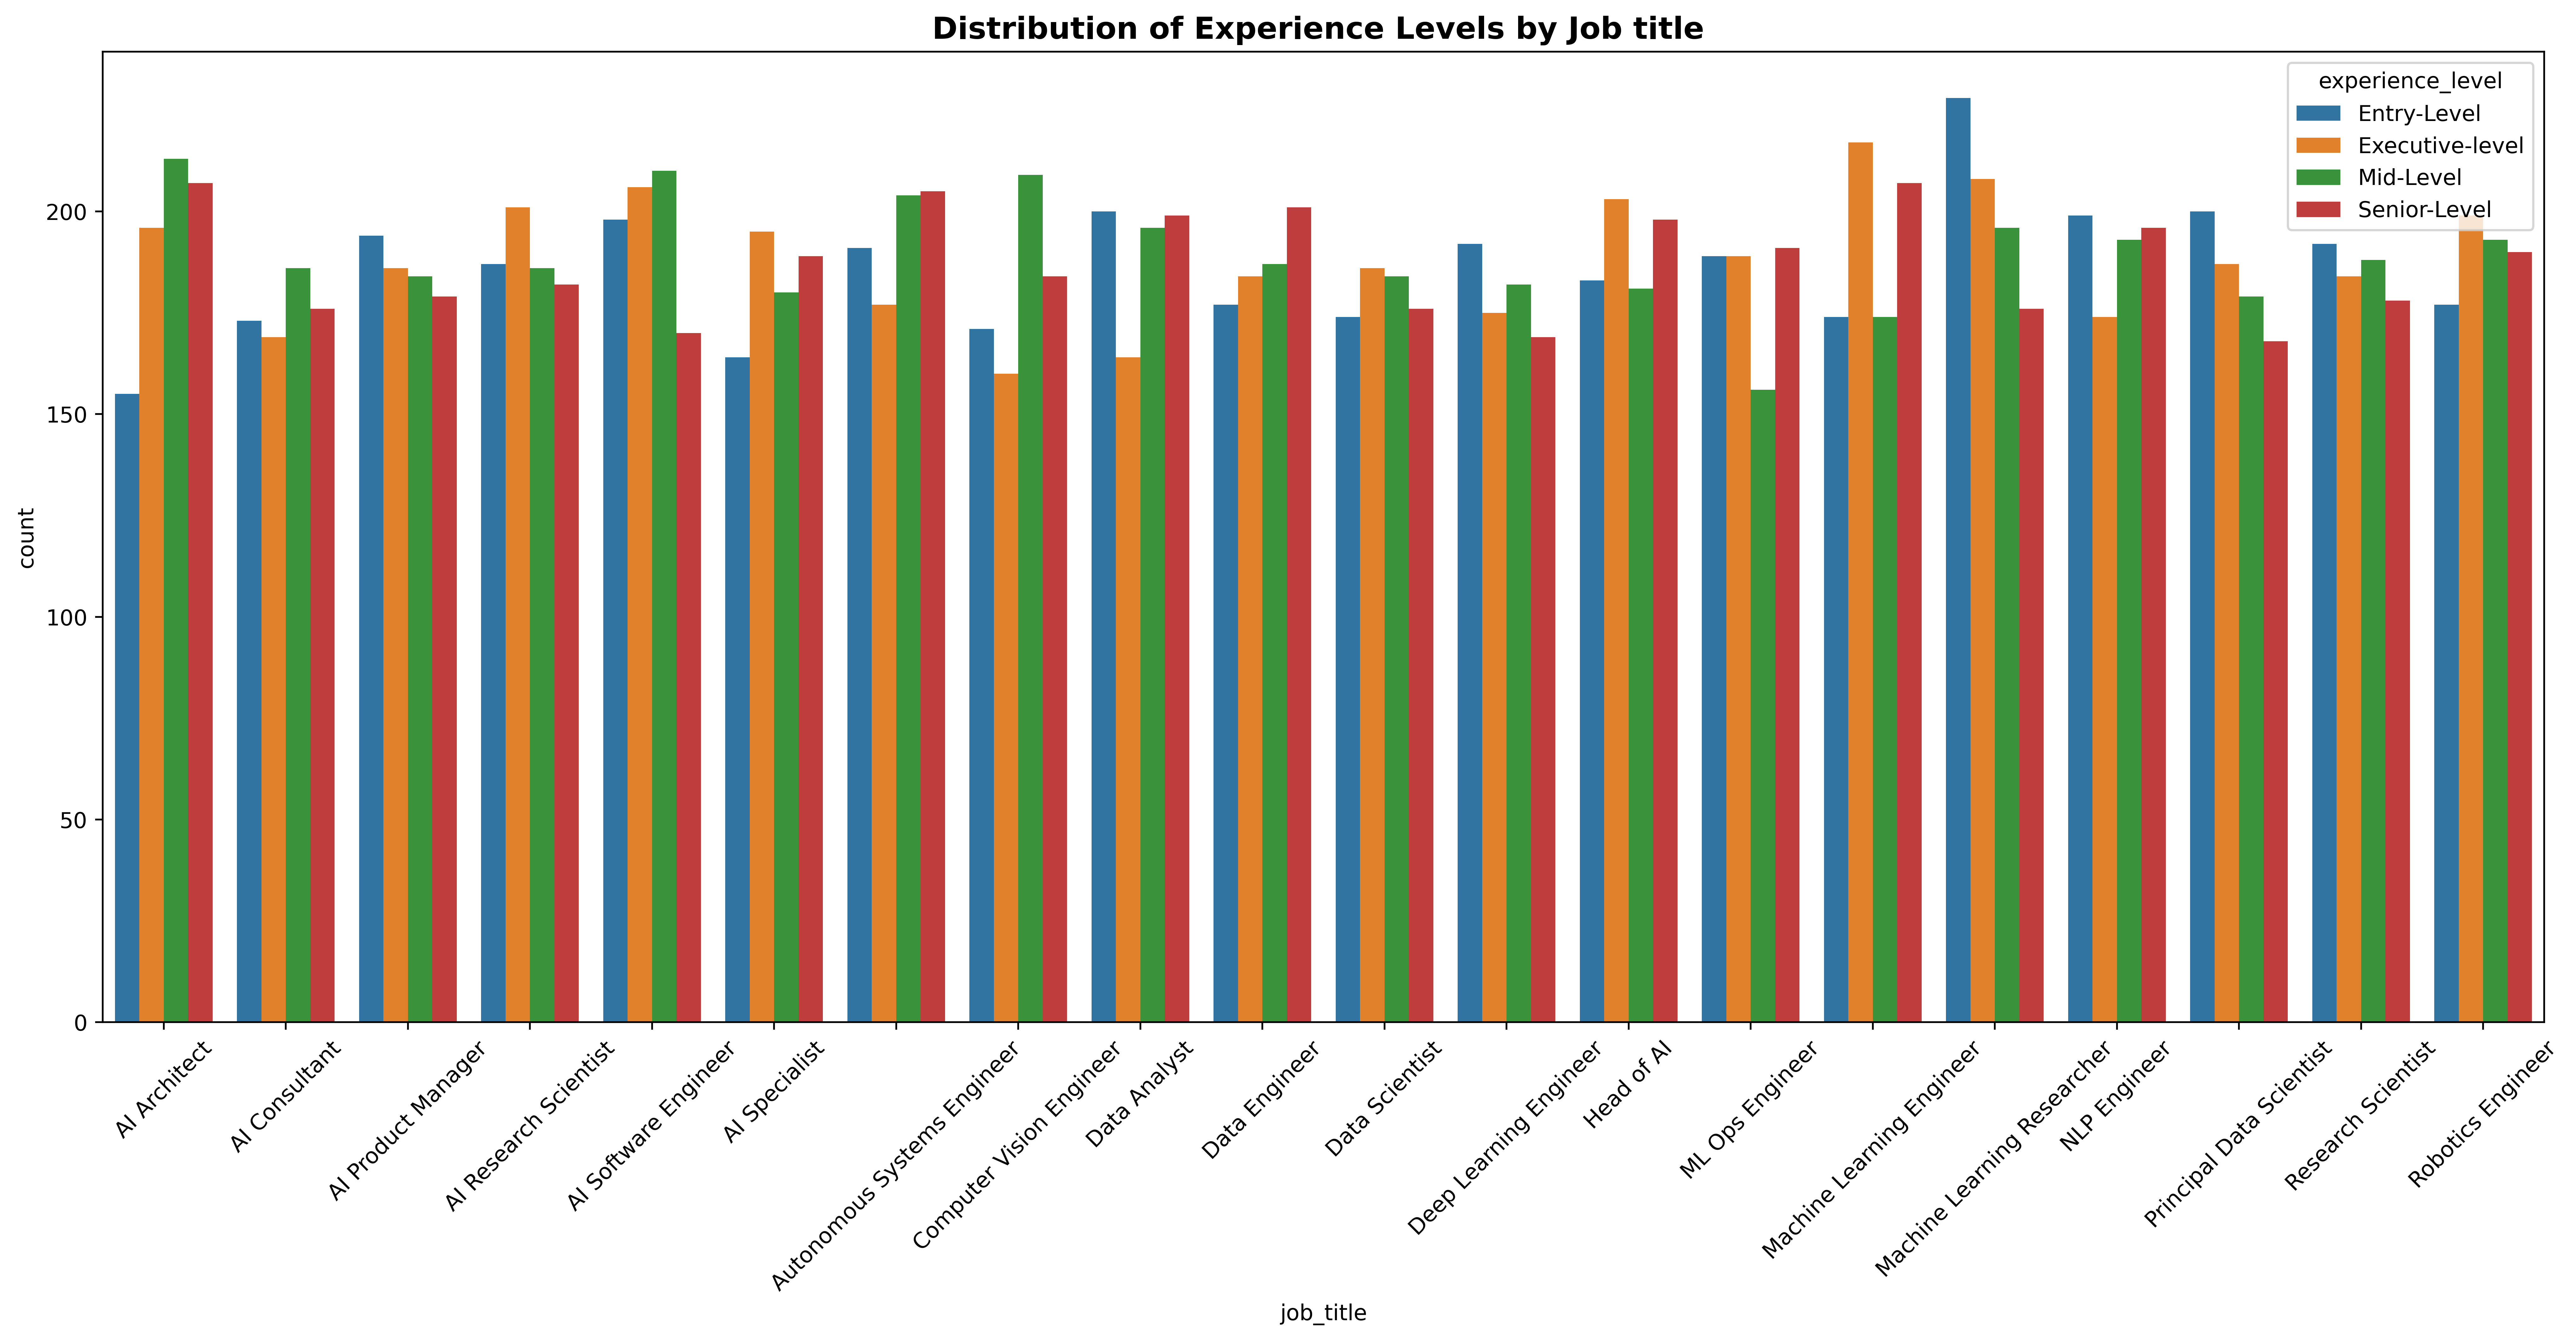

In [117]:
plt.figure(figsize=(20,8) , dpi = 500)
sns.barplot(data = grouped , x = 'job_title',y= 'count',hue= 'experience_level')
plt.xticks(rotation = 45)
plt.title("Distribution of Experience Levels by Job title " , fontsize = 14 , fontweight = 'bold')

plt.show()

Let,s add limit for top 10 

In [118]:
top_jobs = ai_job['job_title'].value_counts().head(10).index
filtered = ai_job[ai_job['job_title'].isin(top_jobs)]
grouped = filtered.groupby(['job_title','experience_level']).size().reset_index(name='count')


In [119]:
grouped

,job_title,experience_level,count
0,AI Architect,Entry-Level,155
1,AI Architect,Executive-level,196
2,AI Architect,Mid-Level,213
3,AI Architect,Senior-Level,207
4,AI Research Scientist,Entry-Level,187
5,AI Research Scientist,Executive-level,201
6,AI Research Scientist,Mid-Level,186
7,AI Research Scientist,Senior-Level,182
8,AI Software Engineer,Entry-Level,198
9,AI Software Engineer,Executive-level,206


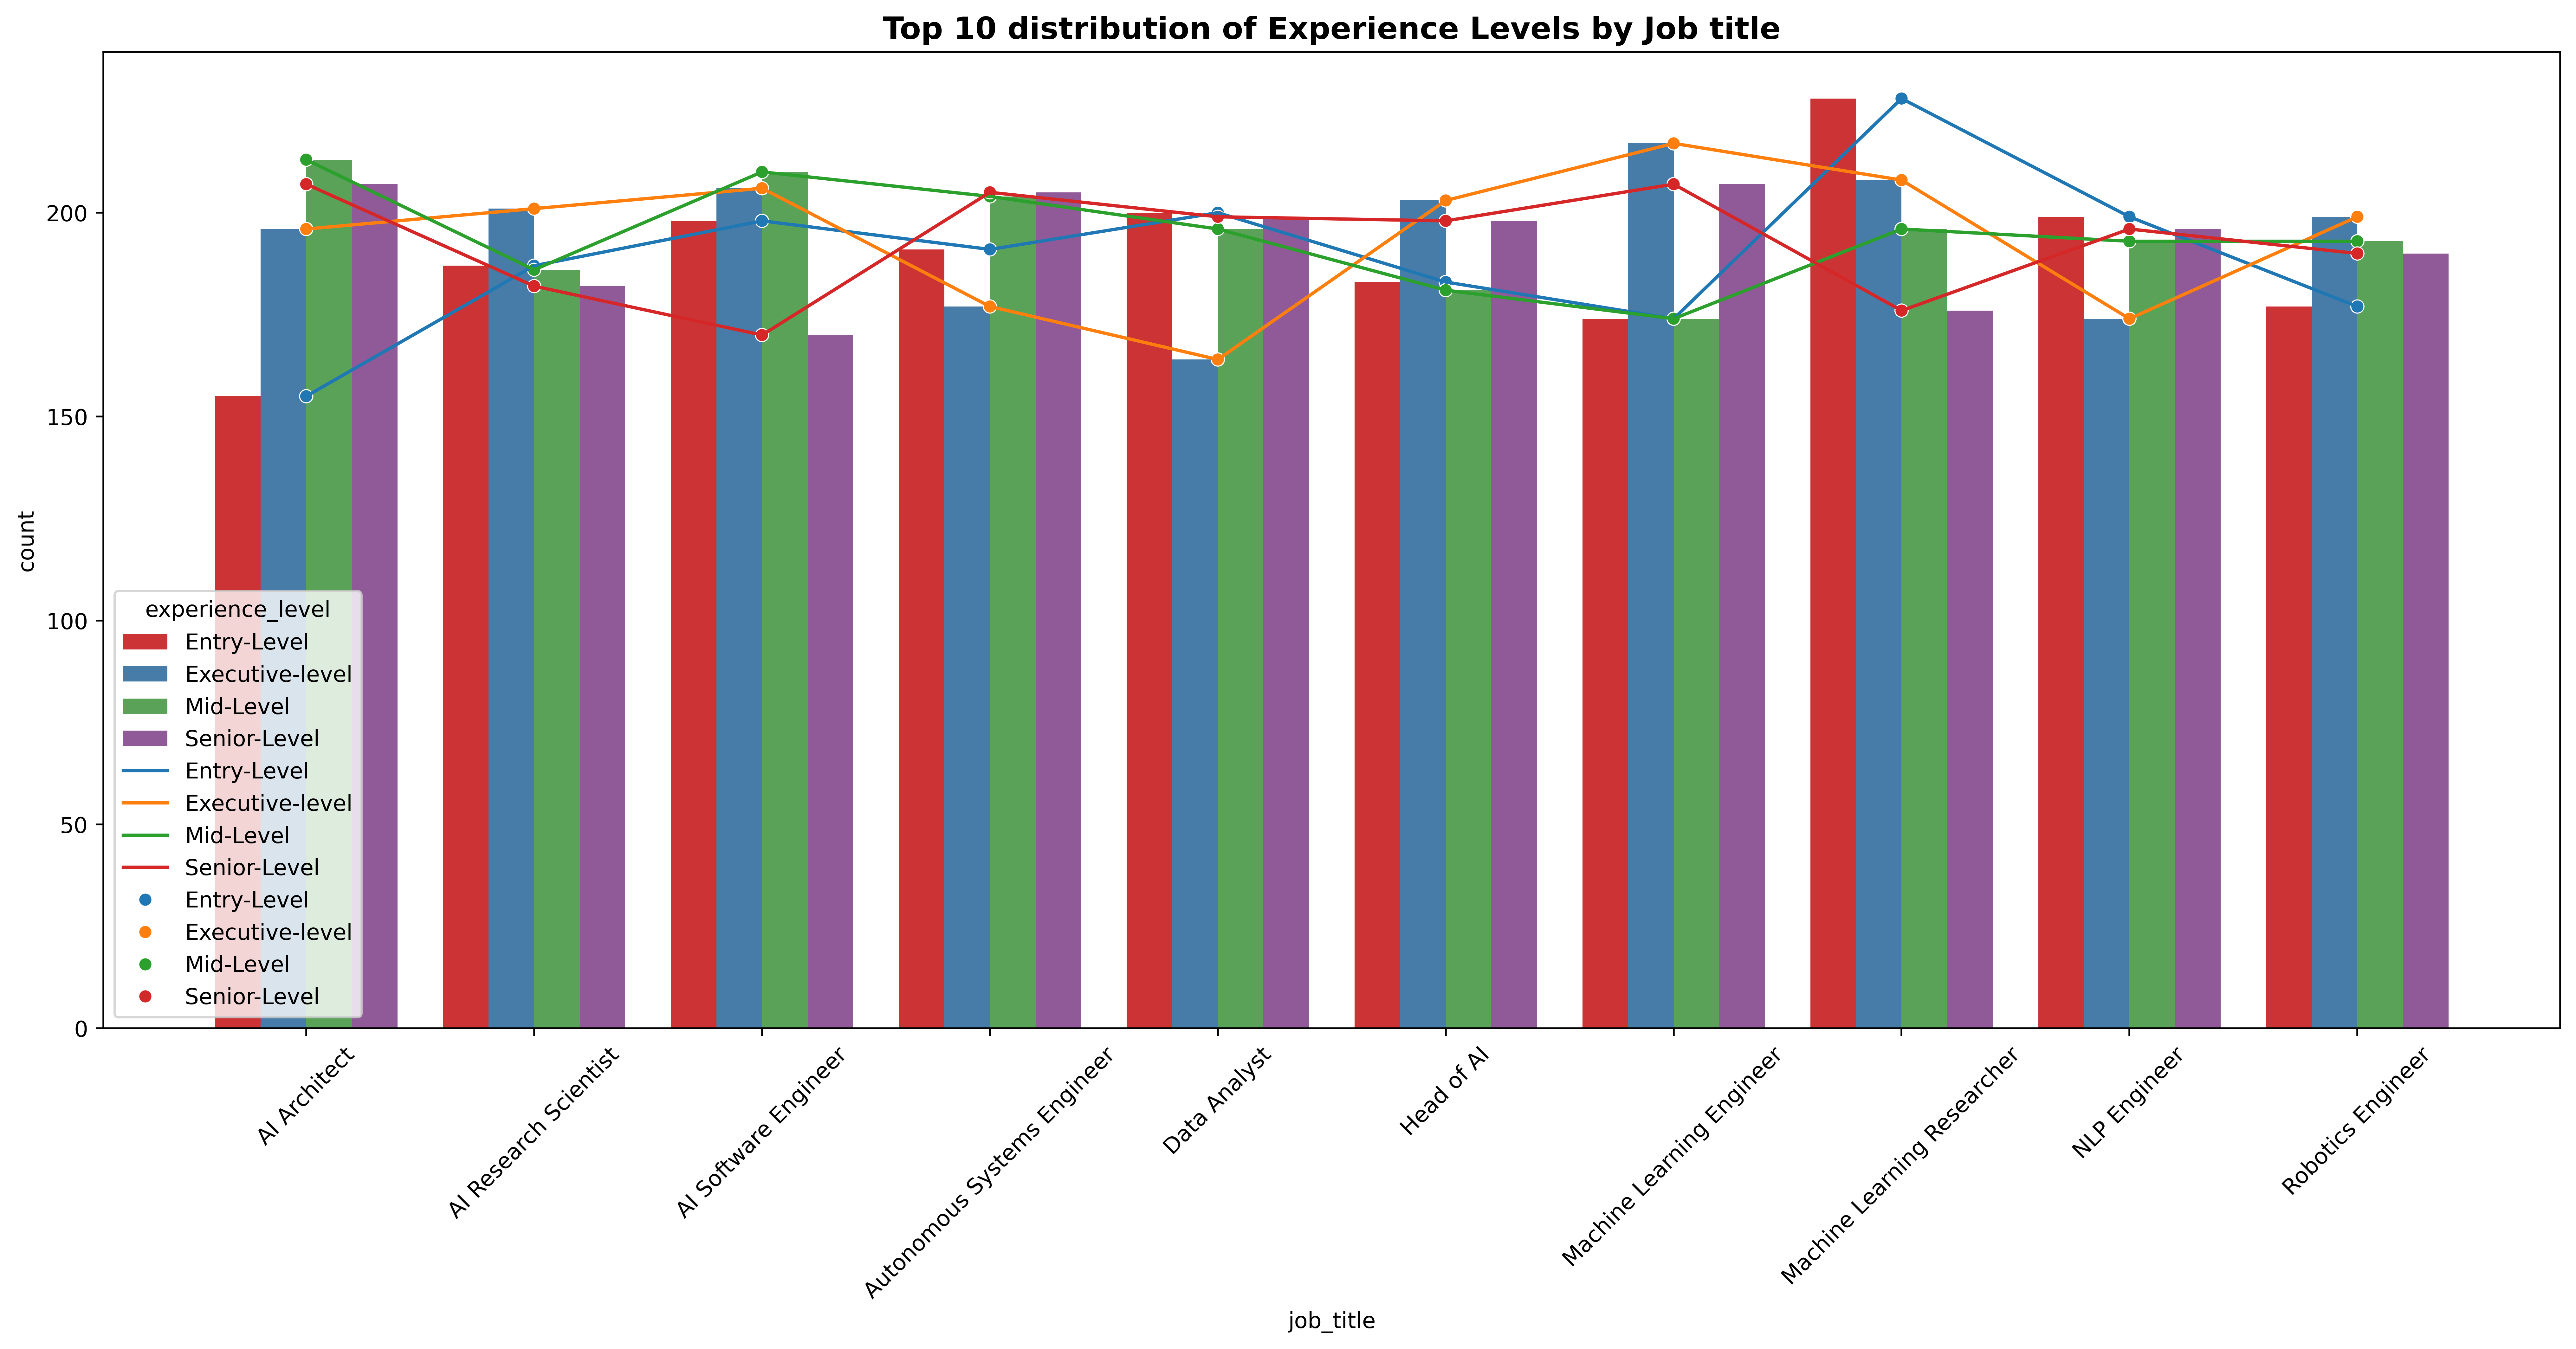

In [120]:
plt.figure(figsize=(20,8) , dpi = 500)
sns.barplot(data = grouped , x = 'job_title',y= 'count',hue= 'experience_level',palette='Set1')
sns.lineplot(data = grouped , x = 'job_title',y= 'count',hue= 'experience_level')
sns.scatterplot(data = grouped , x = 'job_title',y= 'count',hue= 'experience_level')
plt.xticks(rotation = 45)
plt.title(" Top 10 distribution of Experience Levels by Job title " , fontsize = 14 , fontweight = 'bold')
plt.show()

Which employment type(full-time,part-time,contract,Freelancer) is most common in AI job posting ???

In [121]:
ai_job['employment_type'].unique()

array(['CT', 'FL', 'PT', 'FT'], dtype=object)

In [122]:
def employee_type(type):
    if type == 'CT':
        return 'Contract'
    if type == 'PT':
        return 'Part-Time'
    if type == 'FT':
        return 'Full-Time'
    else:
        return 'Freelance'

In [123]:
ai_job['employment_type'] = ai_job['employment_type'].apply(employee_type)

In [124]:
ai_job['employment_type'].value_counts()

employment_type
Full-Time    3812
Freelance    3758
Contract     3721
Part-Time    3709
Name: count, dtype: int64

In [125]:
ai_job['job_title'].unique()

array(['AI Research Scientist', 'AI Software Engineer', 'AI Specialist',
       'NLP Engineer', 'AI Consultant', 'AI Architect',
       'Principal Data Scientist', 'Data Analyst',
       'Autonomous Systems Engineer', 'AI Product Manager',
       'Machine Learning Engineer', 'Data Engineer', 'Research Scientist',
       'ML Ops Engineer', 'Robotics Engineer', 'Head of AI',
       'Deep Learning Engineer', 'Data Scientist',
       'Machine Learning Researcher', 'Computer Vision Engineer'],
      dtype=object)

Let,s filter out the Ai jobs in job_title 

In [126]:
ai_job_filtered = ai_job[ai_job['job_title'].str.contains('AI',case=False,na=False)]
print(ai_job_filtered['job_title'])

0        AI Research Scientist
1         AI Software Engineer
2                AI Specialist
4                AI Consultant
5                 AI Architect
                 ...          
14981       AI Product Manager
14983             AI Architect
14985             AI Architect
14987    AI Research Scientist
14998               Head of AI
Name: job_title, Length: 5251, dtype: object


let,s groupby the ai_job_filtered and employee type

In [127]:
group = ai_job_filtered.groupby(['job_title','employment_type']).size().reset_index(name='count')
group

,job_title,employment_type,count
0,AI Architect,Contract,175
1,AI Architect,Freelance,177
2,AI Architect,Full-Time,222
3,AI Architect,Part-Time,197
4,AI Consultant,Contract,180
5,AI Consultant,Freelance,184
6,AI Consultant,Full-Time,167
7,AI Consultant,Part-Time,173
8,AI Product Manager,Contract,182
9,AI Product Manager,Freelance,181


let,s visualize the data 

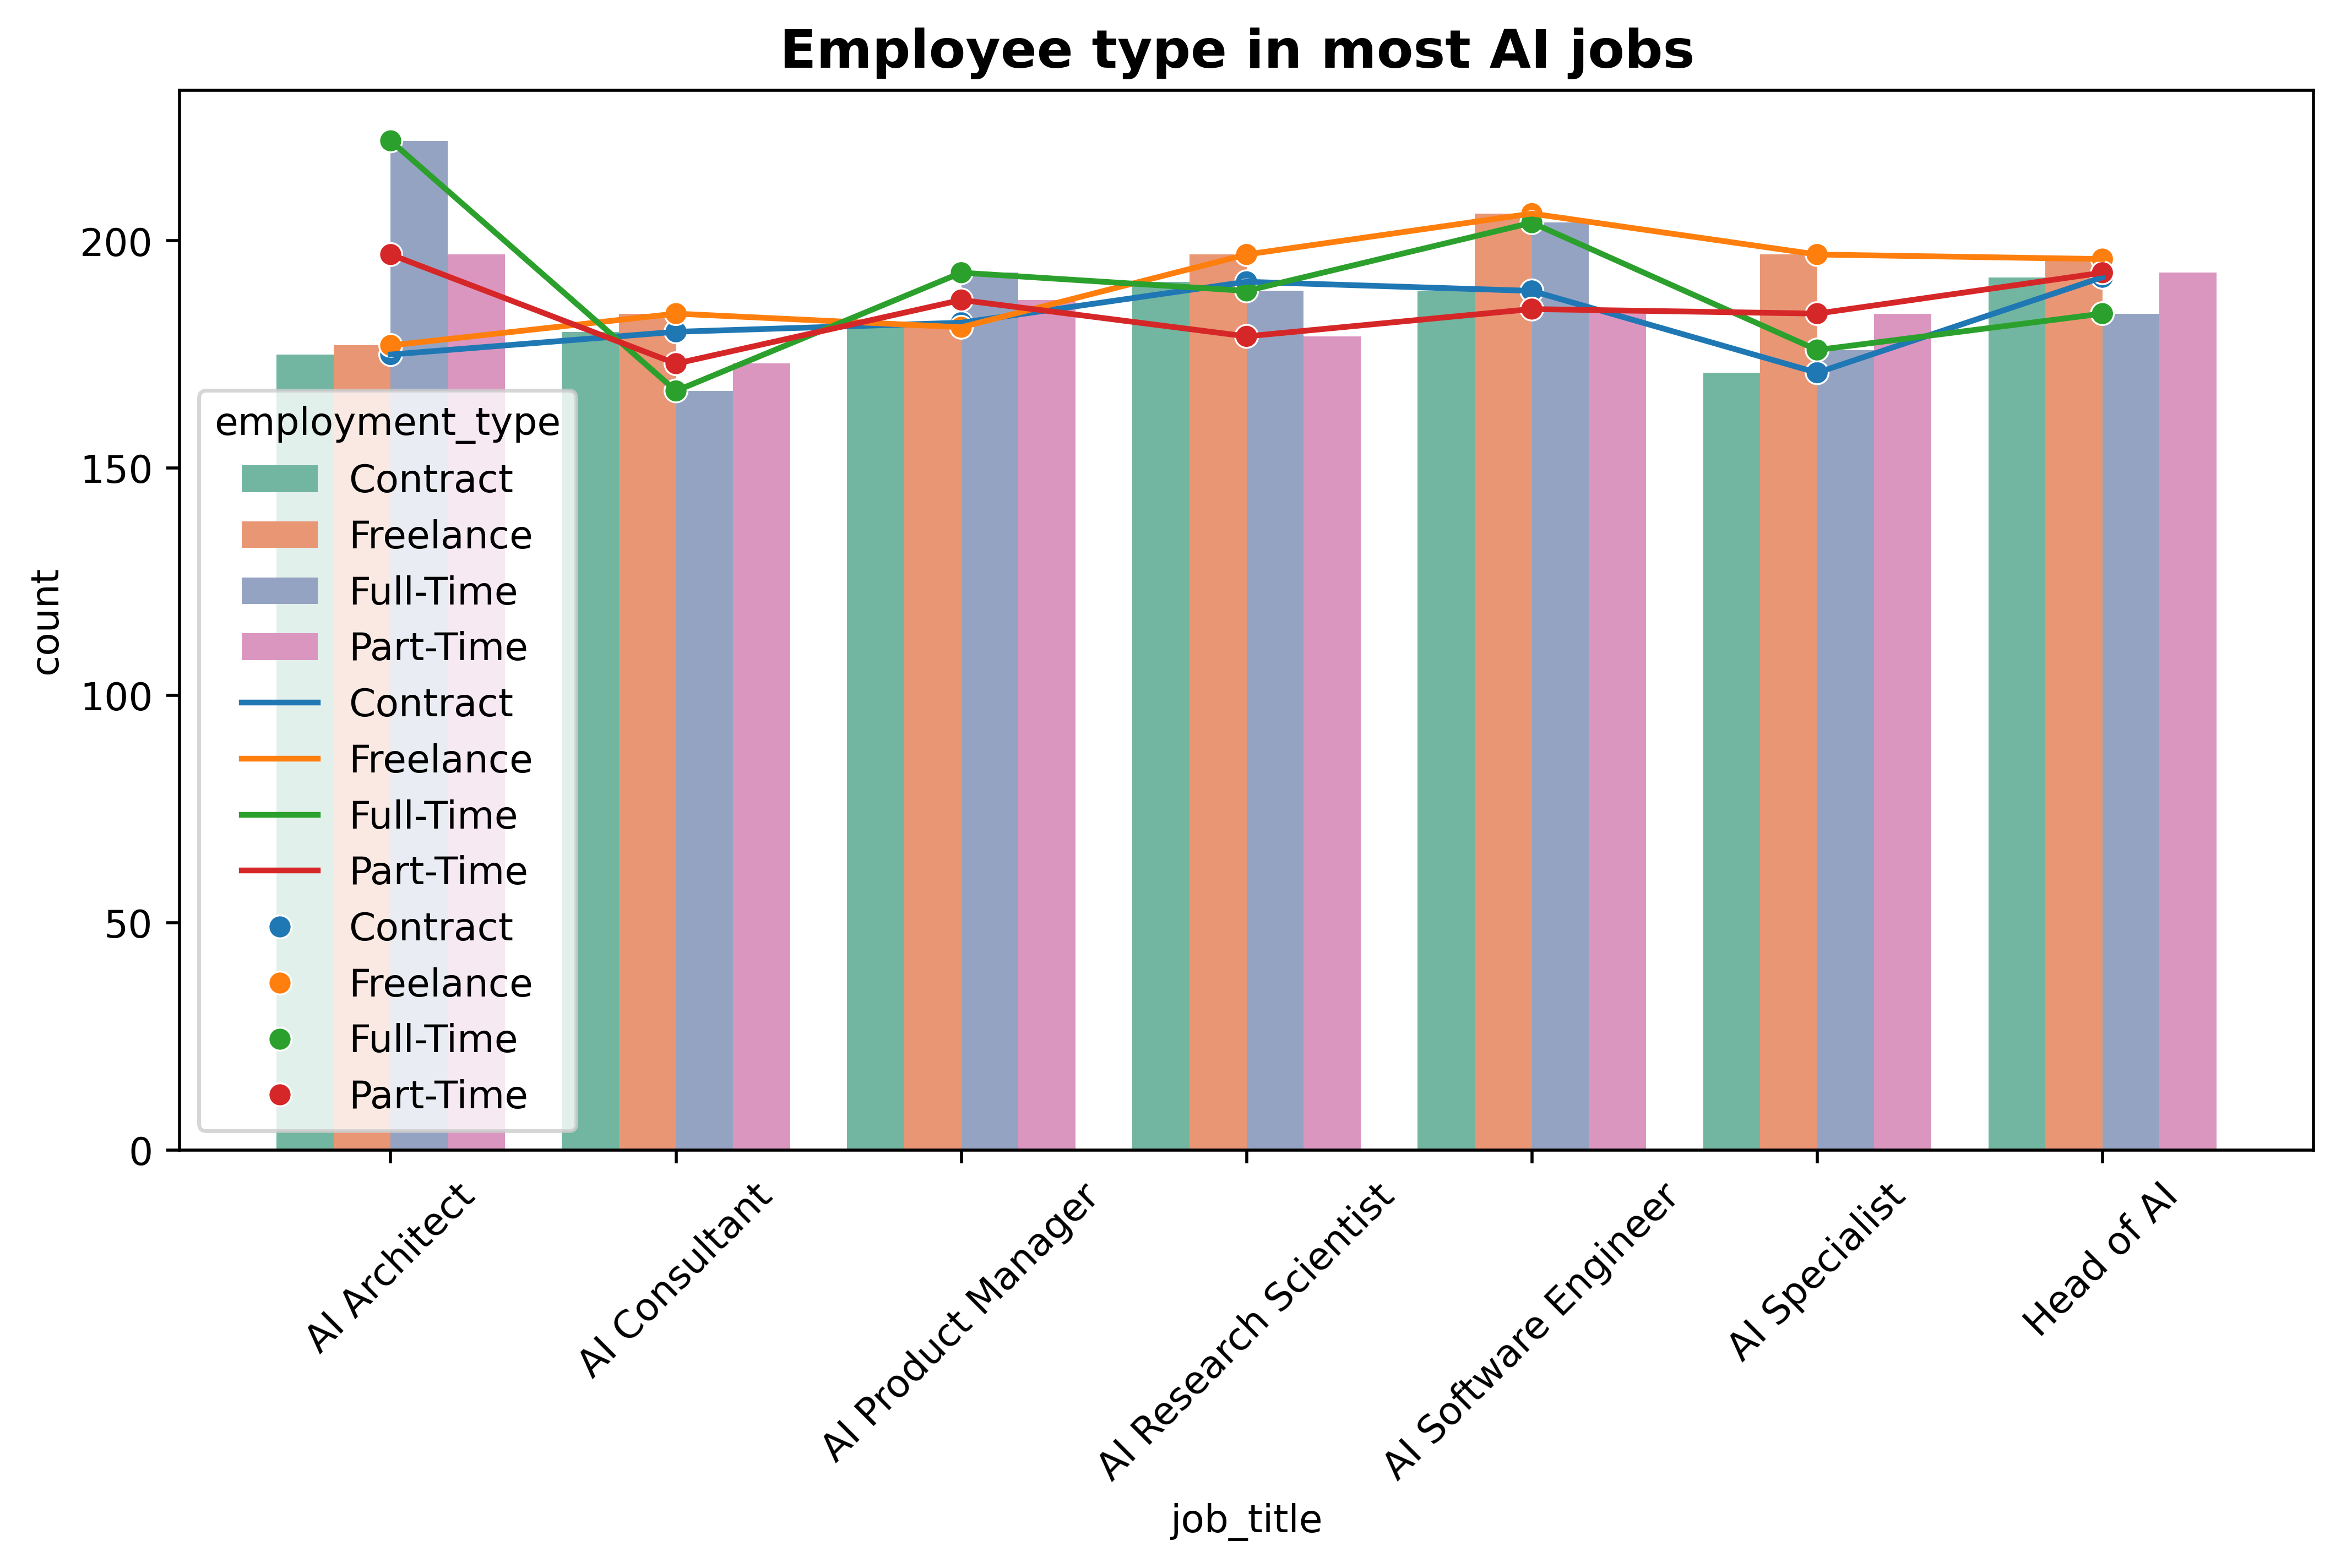

In [128]:
plt.figure(figsize=(10,5) , dpi = 500)
sns.barplot(data = group , x= 'job_title', y = 'count' , hue= 'employment_type' , palette='Set2')
sns.lineplot(data = group , x= 'job_title', y = 'count' , hue= 'employment_type')
sns.scatterplot(data = group , x= 'job_title', y = 'count' , hue= 'employment_type')
plt.title("Employee type in most AI jobs " , fontsize = 14 , fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

3. What are the top 10 countries or regions where AI jobs are posted (based on the company location)

In [129]:
top_countries = (ai_job['company_location'].value_counts().head(10).reset_index())

In [130]:
top_countries

,company_location,count
0,Germany,814
1,Denmark,778
2,Canada,769
3,France,769
4,Austria,765
5,Singapore,764
6,China,763
7,India,754
8,Sweden,752
9,Israel,751


C:\Users\ragha\AppData\Local\Temp\ipykernel_18848\1093573614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_countries , x = 'company_location',y = 'count' , palette='crest' )


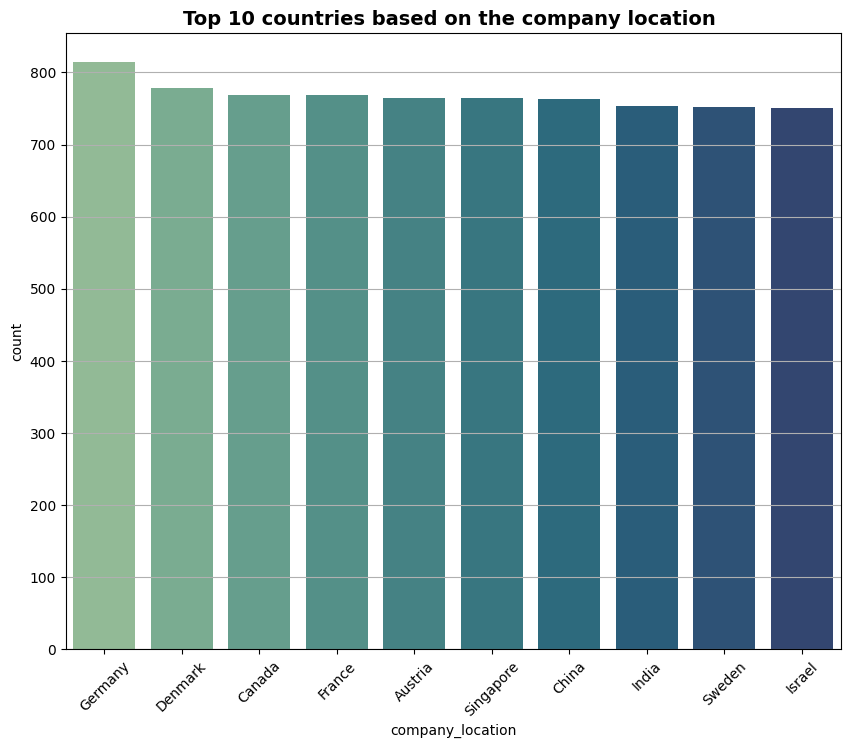

In [131]:
plt.figure(figsize=(10,8))
sns.barplot(data = top_countries , x = 'company_location',y = 'count' , palette='crest' )
plt.grid(axis= 'y' , which= 'both' )
plt.xticks(rotation = 45)
plt.title("Top 10 countries based on the company location " , fontsize = 14 , fontweight = 'bold')
plt.show()


4. Which company size(small , medium , larger) are posting the most jobs 


In [132]:
ai_job['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [133]:
def company_size(size):
    if size == 'L':
        return 'Large'
    if size == 'M':
        return 'Medium'
    else:
        return 'Small'

In [134]:
ai_job['company_size'] = ai_job['company_size'].apply(company_size)

In [135]:
posting  = ai_job['company_size'].value_counts()

df = pd.DataFrame(posting)
type(df)



pandas.core.frame.DataFrame

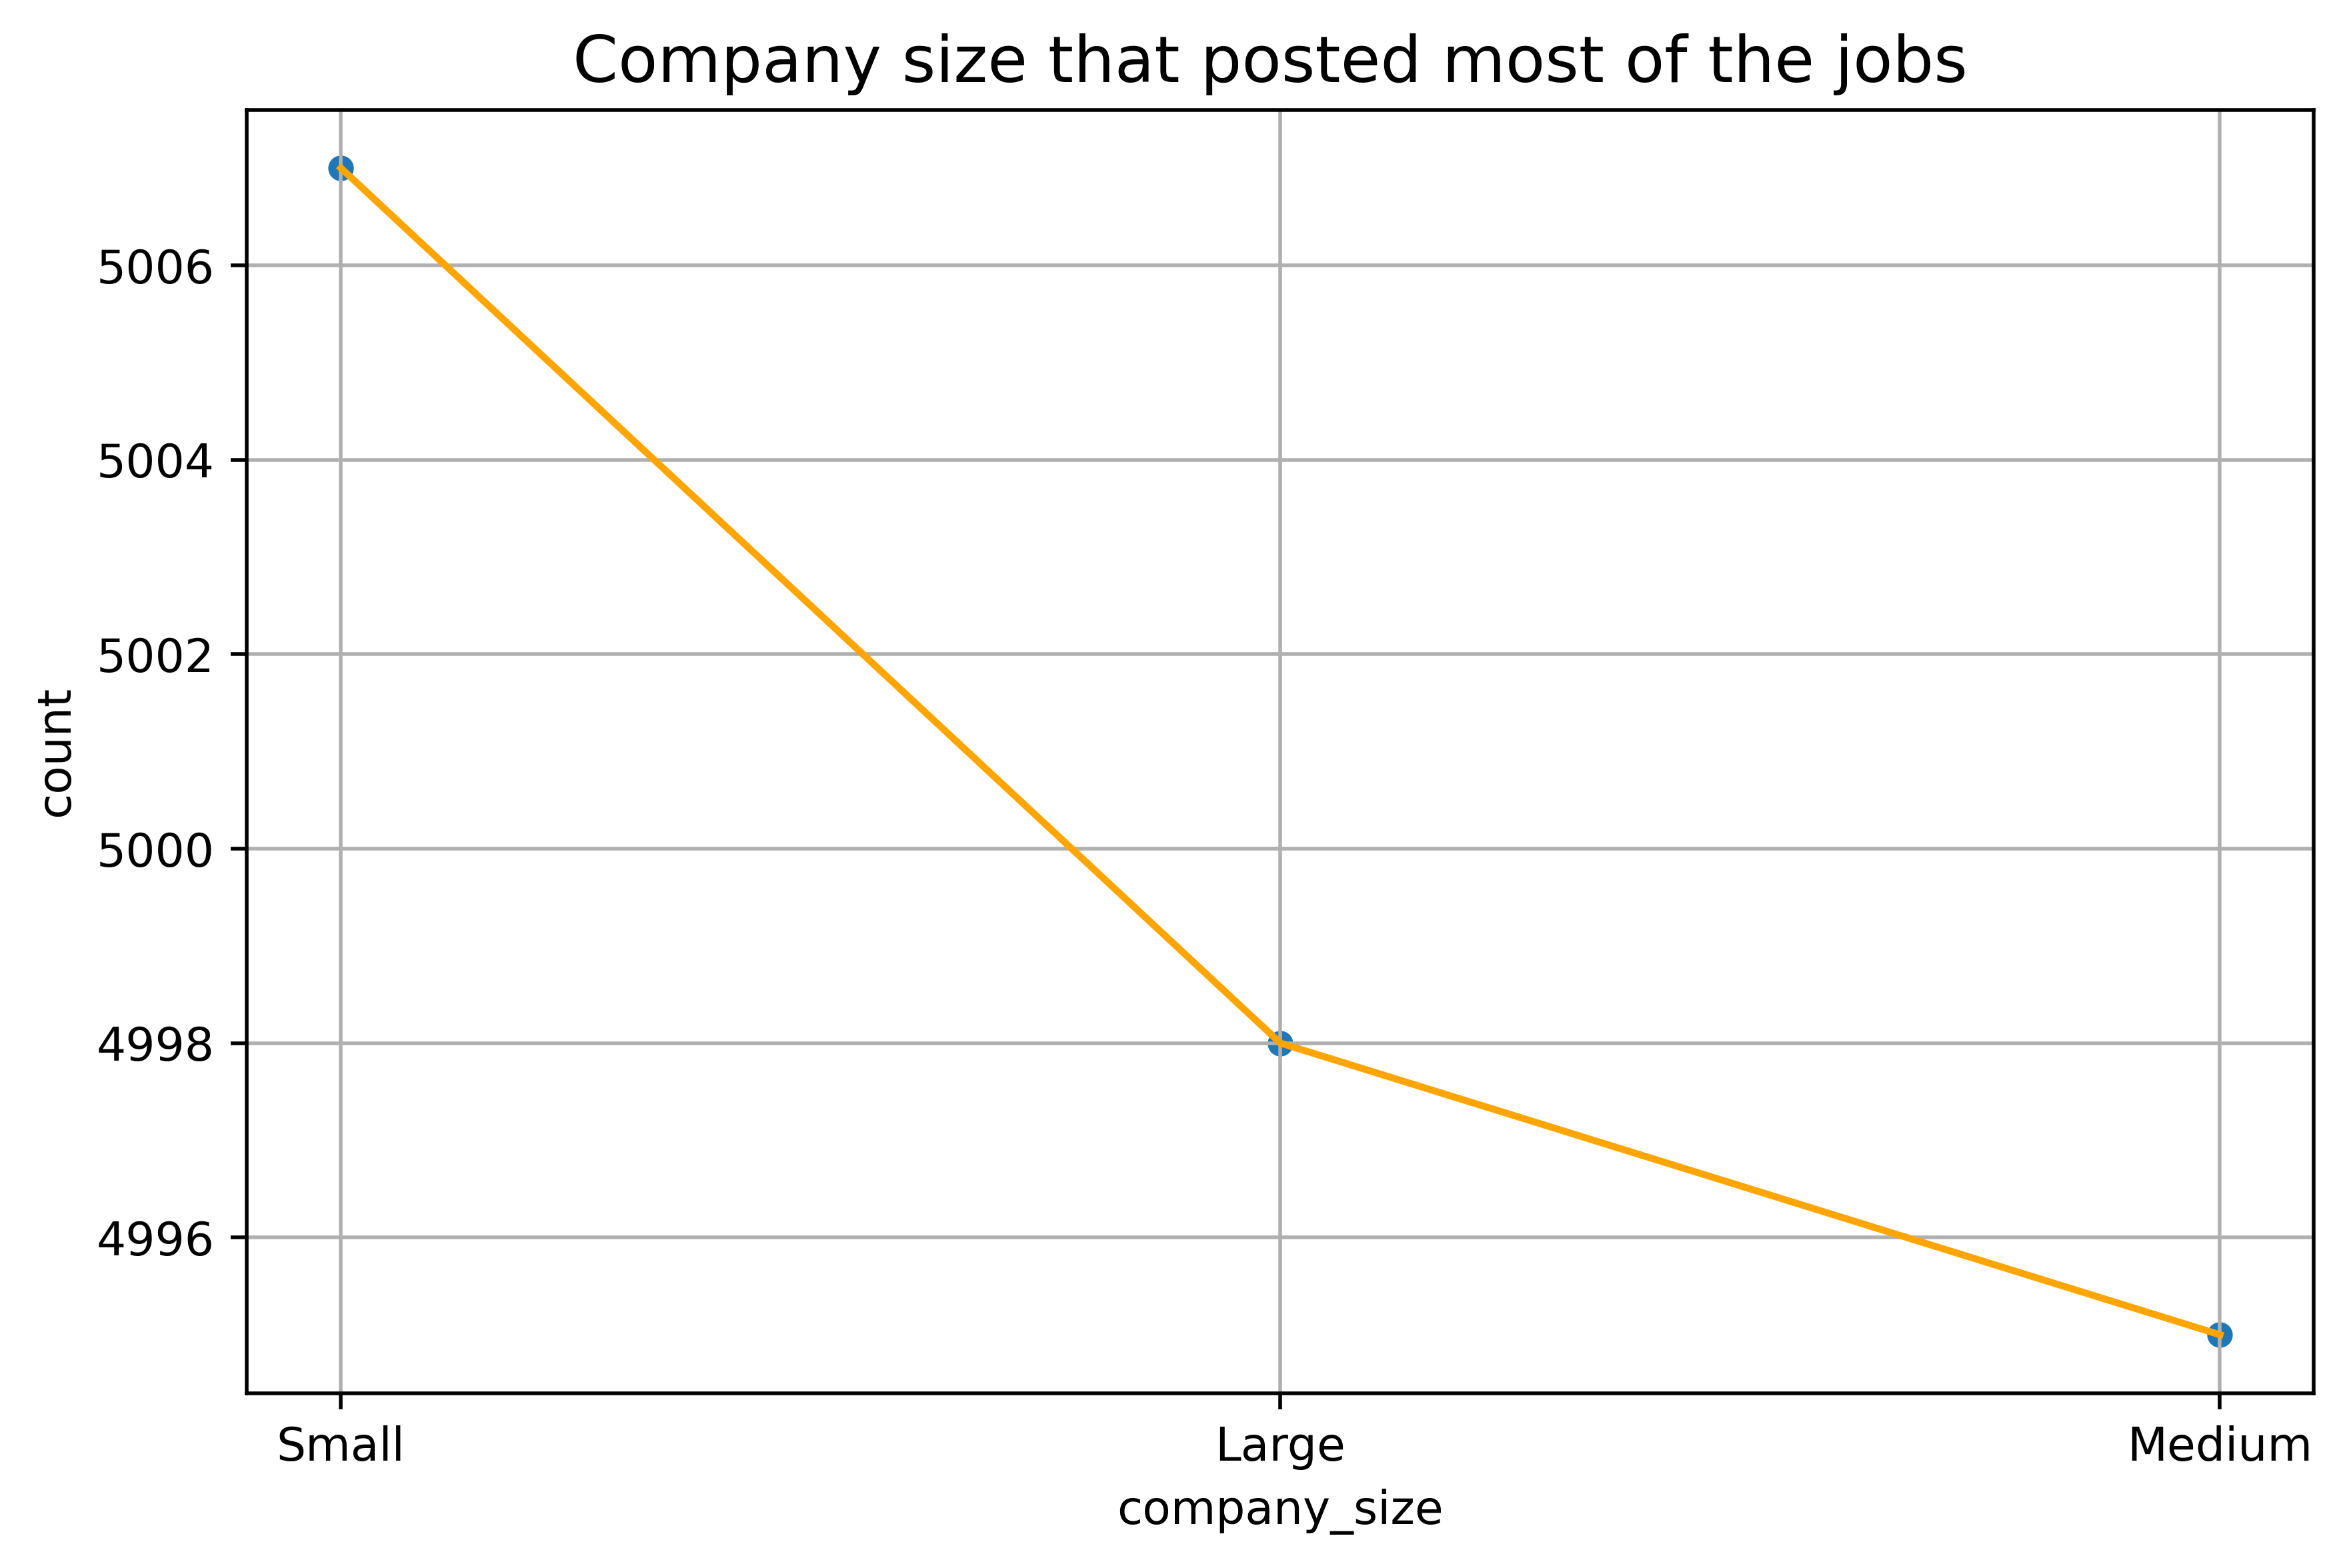

In [148]:

plt.figure(figsize=(8,5),dpi = 500)
sns.lineplot(data= df  , x = 'company_size',  y= 'count' ,color = 'orange')
sns.scatterplot(data=df  , x = 'company_size',  y= 'count')
plt.title("Company size that posted most of the jobs " , fontsize = 14 )
plt.grid()
